## **Static vs Contextual Embeddings**

Static embeddings represent each word as fixed vector.

Contextual embeddings leverage the context to represent each word.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### **Static Word2Vec embeddings**

In [ ]:
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400.7 MB 6.6 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
s1 = "I went to the bank yesterday to withdraw cash."

s2 = "We went fishing by the river bank."

In [ ]:
doc1 = nlp(s1)
doc2 = nlp(s2)

In [ ]:
for token in doc1:
    print(dir(token))
    break

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like

In [ ]:
for token in doc1:
    print(token.text, token.pos_)
    if token.text == 'bank':
        v1 = token.vector

I PRON
went VERB
to ADP
the DET
bank NOUN
yesterday NOUN
to PART
withdraw VERB
cash NOUN
. PUNCT


In [ ]:
type(v1), v1.shape

(numpy.ndarray, (300,))

In [ ]:
v1

array([-6.0877e-01,  3.0253e-01, -1.2351e-01, -2.3647e-01,  2.6650e-01,
        4.2050e-02, -2.6578e-01, -2.6992e-01,  2.3244e-01,  2.7851e+00,
       -1.0186e+00,  1.1200e-01,  4.3443e-01,  1.4527e-01, -4.1152e-01,
        1.8015e-01, -5.1524e-01,  1.3350e+00,  5.9509e-01,  2.8474e-01,
        7.0735e-02,  5.2274e-01, -7.6900e-02,  9.0277e-02, -8.9612e-03,
        1.6206e-01, -1.8839e-03,  4.0112e-01, -2.8902e-01,  2.8905e-01,
        3.1016e-01, -1.8943e-01,  5.0519e-01, -9.0029e-02, -3.0258e-01,
        3.9029e-01, -8.5927e-02,  3.2403e-01,  1.7586e-01, -3.2031e-01,
        2.9916e-02, -5.8376e-01,  6.5444e-01, -3.9174e-01,  3.0752e-01,
        3.6037e-01,  5.2634e-01, -5.1666e-01, -6.6128e-03, -2.7845e-01,
       -2.7471e-01,  1.3553e-01, -2.0201e-01,  3.6314e-01, -2.1917e-01,
       -2.5175e-02, -4.6234e-01, -2.0859e-01,  2.9457e-01, -4.3064e-03,
        4.0130e-01,  9.9298e-02,  3.7214e-01,  4.0642e-01, -1.8522e-01,
        5.4174e-02,  6.0451e-01,  8.7534e-01,  2.2075e-01, -6.78

In [ ]:
for token in doc2:
    print(token.text, token.pos_)
    if token.text == 'bank':
        v2 = token.vector

We PRON
went VERB
fishing VERB
by ADP
the DET
river PROPN
bank NOUN
. PUNCT


In [ ]:
type(v2), v2.shape

(numpy.ndarray, (300,))

In [ ]:
(v1 == v2).all()

True

The word2vec representation for the word ***bank*** in both the sentences is the same even though the sense of usage is different.

### **Contextual Embeddings using BERT**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.9 MB/s 
     |████████████████████████████████| 596 kB 49.2 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

Pretrained models on huggingface: https://huggingface.co/transformers/v3.3.1/pretrained_models.html

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def embed_text_using_bert(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    return last_hidden_states

How to get vectors using BERT?

In [ ]:
to_embed = "We would like to embed this text!"

print("Vocab ids:")
print(tokenizer.encode(to_embed))

Vocab ids:
[101, 2057, 2052, 2066, 2000, 7861, 8270, 2023, 3793, 999, 102]


In [ ]:
print("Token ids:")
print(tokenizer.convert_ids_to_tokens([101, 2057, 2052, 2066, 2000, 7861, 8270, 2023, 3793, 999, 102]))

Token ids:
['[CLS]', 'we', 'would', 'like', 'to', 'em', '##bed', 'this', 'text', '!', '[SEP]']


In [ ]:
vec = embed_text_using_bert(to_embed)
print(vec.shape)

torch.Size([1, 11, 768])


In [ ]:
mean_vec = vec.mean(1).detach().numpy()
print(mean_vec.shape)

(1, 768)


#### Visualizing contextual vectors in 2d embedding space

In [ ]:
s1 = "I went to the bank yesterday to withdraw cash."
s2 = "We went fishing by the river bank."
s3 = "He has borrowed a loan from the bank."

s4 = "The bank issued a new 10 rupee note yesterday."
s5 = "Please note down the steps directed by the bank."

In [ ]:
for s in [s1, s2, s3, s4, s5]:
    print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(s)))

[1045, 2253, 2000, 1996, 2924, 7483, 2000, 10632, 5356, 1012]
[2057, 2253, 5645, 2011, 1996, 2314, 2924, 1012]
[2002, 2038, 11780, 1037, 5414, 2013, 1996, 2924, 1012]
[1996, 2924, 3843, 1037, 2047, 2184, 21766, 28084, 3602, 7483, 1012]
[3531, 3602, 2091, 1996, 4084, 2856, 2011, 1996, 2924, 1012]


In [ ]:
tokenizer.convert_ids_to_tokens([2924])

['bank']

In [ ]:
s1vec = embed_text_using_bert(s1)[0:4:]
s1vec.shape

torch.Size([1, 12, 768])

In [ ]:
def get_bank_contextual_vector(text):
    bank_idx = tokenizer.encode(text).index(2924)
    v1 = embed_text_using_bert(text).detach().numpy()[0, bank_idx]
    print(v1.shape)
    return v1

In [ ]:
s1vec = get_bank_contextual_vector(s1)
s2vec = get_bank_contextual_vector(s2)
s3vec = get_bank_contextual_vector(s3)
s4vec = get_bank_contextual_vector(s4)
s5vec = get_bank_contextual_vector(s5)

(768,)
(768,)
(768,)
(768,)
(768,)


In [ ]:
(s3vec == s2vec).all()

False

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(np.array([s1vec, s2vec, s3vec, s4vec, s5vec]))

In [ ]:
X_2d.shape

(5, 2)

In [ ]:
import matplotlib.pyplot as plt

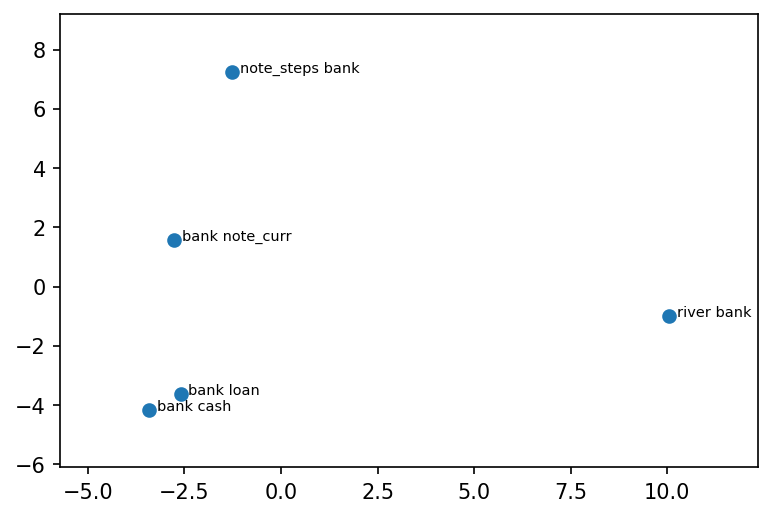

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.scatter(X_2d[:,0], X_2d[:, 1])
ax.margins(0.17)

for _, txt in enumerate(['bank cash', 'river bank', 'bank loan', 'bank note_curr', 'note_steps bank']):
    ax.annotate(txt, (X_2d[_, 0]+0.2, X_2d[_, 1]), fontsize='x-small')

Contextual embeddings from BERT for the word ***'bank'***.